Cargar dependencias

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Obtenemos los datos desde el datasets

In [26]:
# Origen: Nuestro

# Cargar datos desde un archivo CSV
# Visualiza los datos

df = pd.read_csv("datos.csv")
df.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),sunshine_duration (s),precipitation_hours (h)
0,2010-01-01,73,-1.6,-3.2,2.90,16.3,31.0,0.00,12.0
1,2010-01-02,71,-1.2,-5.7,1.00,15.8,23.0,2114.82,8.0
2,2010-01-03,71,-4.9,-8.8,0.00,7.1,16.6,12470.87,0.0
3,2010-01-04,3,-6.3,-9.5,0.00,13.0,23.8,0.00,0.0
4,2010-01-05,3,-5.4,-11.7,0.00,11.2,20.5,16419.52,0.0


Transformamos los datos de lluvia a 1 si llueve y 0 si no llueve

In [27]:
# Origien: Del repo de clases con modificación de datos

df['llueve'] = df['precipitation_sum (mm)'].apply(lambda x: 1 if x > 0 else 0)
df.head()

TypeError: '>' not supported between instances of 'str' and 'int'

Limpiamos los datos eliminando los datos nulos

In [ ]:
# Origien: Repo tutorial de pandas (Curso)
# Extra: https://www.analyticslane.com/2023/04/24/eliminar-las-filas-con-valores-nulos-en-pandas/

# Por defecto el metodo dropna() elimina las filas que tienen al menos un valor NaN
df_limpio = df.dropna()
df_limpio

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),sunshine_duration (s),precipitation_hours (h),llueve
0,2010-01-01,73,-1.6,-3.2,2.9,16.3,31.0,0.00,12.0,1
1,2010-01-02,71,-1.2,-5.7,1.0,15.8,23.0,2114.82,8.0,1
2,2010-01-03,71,-4.9,-8.8,0.0,7.1,16.6,12470.87,0.0,0
3,2010-01-04,3,-6.3,-9.5,0.0,13.0,23.8,0.00,0.0,0
4,2010-01-05,3,-5.4,-11.7,0.0,11.2,20.5,16419.52,0.0,0
...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,51,4.0,0.2,0.2,16.3,28.8,7040.66,2.0,1
3648,2019-12-28,3,2.2,-2.6,0.0,12.2,23.4,20937.14,0.0,0
3649,2019-12-29,3,1.4,-3.6,0.0,13.5,23.8,21436.21,0.0,0
3650,2019-12-30,3,7.0,1.3,0.0,21.1,35.3,15624.59,0.0,0


Separamos los datos en datos de entrenamiento y en datos de prueba

In [ ]:
X = df_limpio[['weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)',
       'wind_speed_10m_max (km/h)', 'wind_gusts_10m_max (km/h)',
       'sunshine_duration (s)', 'precipitation_hours (h)']]
le = LabelEncoder()
y = df_limpio[['llueve']]
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



Prueba modelo


c:\Users\Yugen\Downloads\taller-3\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       398

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



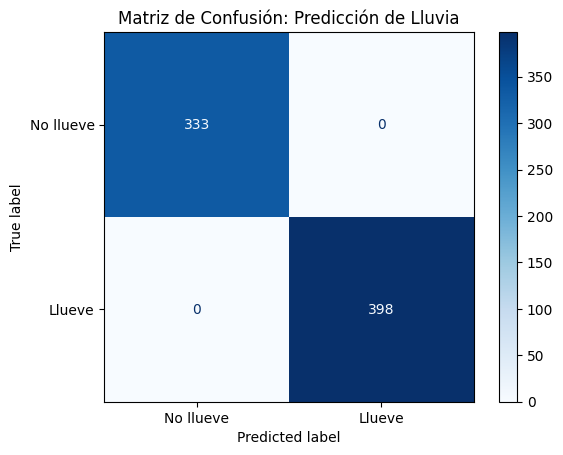

In [ ]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No llueve", "Llueve"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión: Predicción de Lluvia")
plt.show()